In [1]:
import pandas as pd
import numpy as np
import nltk
import string
from matplotlib import pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download ("punkt")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chel1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chel1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("labeled.csv", sep=",")

In [3]:
df.shape

(14412, 2)

In [4]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [5]:
df["toxic"] = df["toxic"].apply(int)

In [6]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [7]:
df["toxic"].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [8]:
for i in df[df['toxic'] == 1]['comment'].head(5):
    print(i)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [9]:
for i in df[df['toxic'] == 0]['comment'].head(5):
    print(i)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [10]:
train_df, test_df = train_test_split(df, test_size=500)

In [11]:
test_df["toxic"].value_counts()

0    323
1    177
Name: toxic, dtype: int64

Для обучения будет использоваться логистическая регрессия, которая принимает вещественные векторы. Для этого проводится несколько этапов предобратки текста, текст разбивается на токены, удаляются токены которые не несут смысловую информацию(знаки препинания, стоп слова/междометия,) приведение всех слов к нижнему регистру, удаление окончаний.

In [12]:
sentence_example = df.iloc[1]["comment"]
# разбитие текста на токены при помощи word_tokenize(из библиотеки nltk-для анализа текста)
tokens = word_tokenize(sentence_example, language="russian")
# удаление занков пунктуации
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
# удаление стоп слов
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
# проведение стемминга - приведение к нижнему регистру и удаление окончаний у слов
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation] 

In [13]:
print(f"Исходный текст: {sentence_example}")
print(f"____________________________________________")
print(f"Токены: {tokens}")
print(f"____________________________________________")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print(f"____________________________________________")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print(f"____________________________________________")
print(f"Токены после стемминга: {stemmed_tokens}")
print(f"____________________________________________")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

____________________________________________
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
____________________________________________
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
____________________________________________
Токены без пунктуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
____________________________________________
Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 

In [14]:
# функция для предобработки всех коментариев
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [15]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [16]:
# применние Tfidf векторизации - кодирование полседовательности токенов
# создание векторайзера и переопредление в нём токенайзера на мой токенайзер
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [17]:
# fit_transform является комбинацией подгонки и преобразования 
features = vectorizer.fit_transform(train_df["comment"])

In [18]:
# обучение модели
model = LogisticRegression(random_state=0)
model.fit(features, train_df["toxic"])

LogisticRegression(random_state=0)

проверка модели

In [19]:
model.predict(features[0])

array([0], dtype=int64)

In [20]:
train_df["comment"].iloc[0]

'Там же написано что якобы прибыль выросла из за интеграции Евросети.\n'

In [21]:
# создание пайплайна для того что бы на вход подавать текст
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [22]:
# пайплайн будет принимать предложения, а не вещественные вектора
model_pipeline.fit(train_df["comment"], train_df["toxic"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001C232B34B80>)),
                ('model', LogisticRegression(random_state=0))])

In [23]:
# проверка модели
model_pipeline.predict(["Оби ван Кеноби: Ну привет"])

array([0], dtype=int64)

In [24]:
model_pipeline.predict(["слушай не пойти ли бы тебе нафиг отсюда?"])

array([1], dtype=int64)

In [25]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.9206349206349206

In [26]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict(test_df['comment']))

0.655367231638418

Модель возвращает вероятности и в зависимости от порога, устанавливает конечный результат(прим.: 0 или 1)

In [27]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df['toxic'], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])

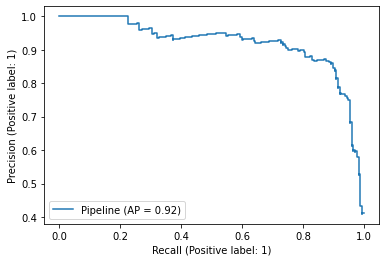

In [28]:
# демонстрация изменения вышеописанного порога на графике : график зависиомости precision от recall
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [29]:
# возвращение индексов, которые выше заданного порога
np.where(prec > 0.95)

(array([329, 330, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
        385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
        398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
        411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
        424, 425, 426, 427, 428, 429, 430], dtype=int64),)

In [30]:
# устраивающий условие задачи порог(precision>0.95)
thresholds[329]

0.6021796858674265

In [31]:
precision_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[362])

0.9402985074626866

In [32]:
recall_score(y_true=test_df['toxic'], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[362])

0.3559322033898305

In [33]:
# подбор гиперпараметров для улучшения модели
# изменение коэффициента регуляризации (стандартный коэф.=1, беру доп. коэф. в 10 раз меньше и в 10 раз больше, cv=3-разбиение на три фолда во время кросвалидации), 
# verbose=4-максимальный коэф.- означает вывод всей информации об обучении
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid={'C': [0.1, 1, 10.]},
        cv=3,
         verbose=4
        )
    )
])

In [34]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.686 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.687 total time=   0.1s
[CV 3/3] END .............................C=0.1;, score=0.689 total time=   0.2s
[CV 1/3] END ...............................C=1;, score=0.842 total time=   0.3s
[CV 2/3] END ...............................C=1;, score=0.833 total time=   0.3s
[CV 3/3] END ...............................C=1;, score=0.831 total time=   0.3s


C:\Users\chel1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.875 total time=   0.7s


C:\Users\chel1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.859 total time=   0.7s


C:\Users\chel1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ............................C=10.0;, score=0.861 total time=   0.6s


C:\Users\chel1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001C234F608B0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [35]:
model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)

In [36]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

C:\Users\chel1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x000001C234F60F70>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [37]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1])

In [38]:
np.where(prec_c_10 > 0.95)

(array([387, 388, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404,
        405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417,
        418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
        431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
        444, 445, 446, 447, 448, 449], dtype=int64),)

In [39]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[387])

0.9508196721311475

In [40]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[406])

0.23163841807909605